# Phase 4 Project: Using NLP to identify sentiments of users towards Apple & Google

# Buisness Problem

When we consider twitter as a platform to share opinionated thoughts and ideas we often overlook the impact that our opinions can make. Now with the aquisition of twitter for 44 billion by Mr. Musk- a very iconic entrepenurer, he has made it a purpose to reform twitter to his utopia. It can be made more representative of human opinions and become a critical source for evaluating customer satisfacation/disappointment. 


One of the major problems that occurs on twitters platform is the authetnicity of the tweet, and the most direct current way to validate is with the 'yellow check mark'. Mr. Musk has already proposed the following restrictions:

1. A permanent ban policy for impersonation, unless the word 'parody' is mentioned in the handle.

2. Name changes will cause loss of a verified checkmark, which ironically can be purchased for $8 a subscription

These two fixes may allow tweets to be more impactful and representative of the consumer's view of the company thus a NLP model to assess customer sentiment is needed
__________________________________________________


# How does the new buisness model affect both companies and consumers?

1. How does this affect the population?

    This now creates a problem amongst users, where sentiment analysis via NLP can be used by twitter to help take the positive and negative tweets of a user and reallocate their issue to the current @handle. Using NLP to predict the sentiment of your tweets is a fantastic way to avoid being blocked if your tweets are too negatively charged. 


2. How does this affect companies?

    With NLP, you are able to predict the sentiment of tweets: whose results can be transffered to the proper twitter account (for instance problems with iphone can be directed to apple support; on the otherhand, problems with Google's Pixel 7 can be directed towards the company's help handle

3. How does this affect stakeholders?
 
    The effect that this aquisition warrants the current buisness problem to be addressed, because the stakeholders: Apple and Google can use the sentiment of the tweet to help analyze and construct solutions on an individual preference- should they continue to utilize the platform they would want to address sentiments in tweets in order preserve the company name. On a similar note- **other tweets associated with other companies can be analyzed with our models to help build their customer-company relationship**

__________________

# The dataset

The dataset obtained from crowdflower is originally described as judging emotions about the brand and products from the twitter platform.

It is imperative to note that in the past historically, Apple has 0 tweets on it's company account, the account does not follow anyone despite having over 8.7 million followers. It is interesting to note that ther seems no intention of promoting their own products on the company platform but rather on their support channel with almost 1.5Million followers to date. 

On the otherhand, Google's main account has about 27.4 Million followers and actively folowing 295 other accounts. Google, unlike apple, identifies the product alongside their tweets, and engages with the platform actively

Let us look into the dataset in order to identify any possible problems


In [79]:
#import the necsesary libraries 
import pandas as pd
import numpy as np
import csv
import matplotlib as plt

In [80]:
 #the data is not UTF-8 encoded, thus foreign languages come up as boxes- latin1 is the best case scenario to avoid errors and retain tweets 
df =  pd.read_csv('tweets.csv', encoding ='latin1')
df  

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link} #google #circles",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their time fell back an hour this weekend. Of course they were the New Yorkers who attended #SXSW.,NaN,No emotion toward brand or product


In [81]:
#let's address foreign languages and how much of the deciphered information is actually useful. 
#look at the last column
display(df.iloc[-1].tweet_text)
#take that regrex patttern and try to find others like it within this dataframe
print('\x8cÏ¡')
#convert
df.tweet_text = df.tweet_text.convert_dtypes(str)
#find the values equal to the displayed character 
df[df['tweet_text'].str.contains('\x8cÏ¡')]

'\x8cÏ¡\x8eÏà\x8aü_\x8b\x81Ê\x8b\x81Î\x8b\x81Ò\x8b\x81£\x8b\x81Á\x8bââ\x8b\x81_\x8b\x81£\x8b\x81\x8f\x8bâ_\x8bÛâRT @mention Google Tests \x89ÛÏCheck-in Offers\x89Û\x9d At #SXSW {link}'

Ï¡


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @mention Google Tests ÛÏCheck-in OffersÛ At #SXSW {link},NaN,No emotion toward brand or product


In [82]:
#we will drop this based on location 
df.drop(df.tail(1).index,inplace=True)

In [83]:
#find duplicates that only display the first row 
df2 = df[df.duplicated('tweet_text')]
print(df2.shape)

(27, 3)


In [84]:
#drop duplicate tweet_text 
df.drop(df2.index, inplace=True)

In [85]:
df[df.duplicated('tweet_text')].shape

(0, 3)

In [86]:
#let's convert all the accents into the proper english language format 
#https://stackoverflow.com/questions/37926248/how-to-remove-accents-from-values-in-columns
df['tweet_text'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion
...,...,...,...
9087,"@mention Yup, but I don't have a third app yet. I'm on Android, any suggestions? #SXSW CC: @mention",NaN,No emotion toward brand or product
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link} #google #circles",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev",NaN,No emotion toward brand or product


_________________

### Analysis of the dataset shows that we have an imbalanced class, where the emotion of the product or brand is not specified. 

<AxesSubplot:>

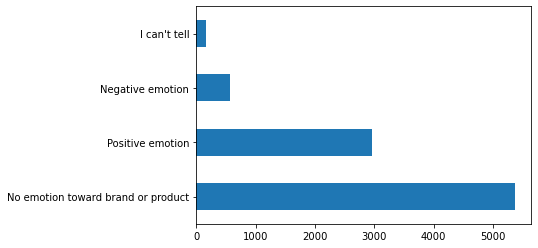

In [87]:
#we can see clearly that 'no emotion' is the most pervalent outcome for our target variable.
df= df.convert_dtypes(str)
df.is_there_an_emotion_directed_at_a_brand_or_product.value_counts().plot(kind='barh', stacked = False)

<AxesSubplot:>

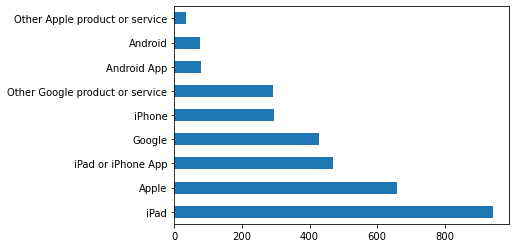

In [88]:
#this needs to be cleaned, furthermore we need to isolate some stuff
df.emotion_in_tweet_is_directed_at.value_counts().plot(kind='barh', stacked = False)

___________________

In [89]:
#insert EDA here 
#lets look at iphone without regrex and based on conditionals 
df[df['tweet_text'].str.contains('iphone')|df['tweet_text'].str.contains('iPhone')]


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
17,I just noticed DST is coming this weekend. How many iPhone users will be an hour late at SXSW come Sunday morning? #SXSW #iPhone,iPhone,Negative emotion
18,"Just added my #SXSW flights to @planely. Matching people on planes/airports. Also downloaded the @KLM iPhone app, nicely done.",iPad or iPhone App,Positive emotion
...,...,...,...
9072,@mention your iPhone 4 cases are Rad and Ready! Stop by tomorrow to get them! #Sxsw #zazzlesxsw #sxswi {link},iPhone,Positive emotion
9073,At #SXSW your iphone charger is your best friend.,<NA>,No emotion toward brand or product
9077,@mention your PR guy just convinced me to switch back to iPhone. Great #sxsw coverage. #princess,iPhone,Positive emotion
9085,I've always used Camera+ for my iPhone b/c it has an image stabilizer mode. Suggestions for an iPad cam app w/ same feature? #SXSW #SXSWi,iPad or iPhone App,Positive emotion


In [90]:
#we will need to feed in the emotion_in_tweeet_is_directed_at due to the low count of the values. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9065 entries, 0 to 9091
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9064 non-null   string
 1   emotion_in_tweet_is_directed_at                     3280 non-null   string
 2   is_there_an_emotion_directed_at_a_brand_or_product  9065 non-null   string
dtypes: string(3)
memory usage: 283.3 KB


In [91]:
#first get rid of any tweet_text nulls, an empty value is useless
print(df.tweet_text.isnull().any())


True


In [92]:
#locate nan
display(df[df['tweet_text'].isna()])
#delete because there is no value to the project

# Drop rows that has NaN values on selected columns
df=df.dropna(subset=['tweet_text'])

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
6,<NA>,<NA>,No emotion toward brand or product


optimizing the data 

In [93]:
#this column is too ambiguous, through pd functions we can extract better columns
df.emotion_in_tweet_is_directed_at.value_counts()

iPad                               943
Apple                              659
iPad or iPhone App                 469
Google                             428
iPhone                             296
Other Google product or service    293
Android App                         80
Android                             77
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: Int64

In [94]:
#set everything to a string first 
df = df.convert_dtypes(str)

In [95]:
#explore the unique characters of each tweet in the tweet_text column
#set(df.tweet_text.apply(list).sum())

In [96]:
#create a function to identify uniquely the engliush characters to find the tweets 
#def split(word):
#    return list(word)

#split
#standardletters= 'abcdefghijklmnopqrstuvwyxz123456789'
#standardletters = split(standardletters)

In [97]:
#put in a placeholder so we can manipulate the columns
df['emotion_in_tweet_is_directed_at'] = df['emotion_in_tweet_is_directed_at'].fillna('placeholder')

In [98]:
#check and assert 
df['emotion_in_tweet_is_directed_at'].isna().sum()

0

In [99]:
#ill find the conditional for this later, this will suffice for now 
df[df['tweet_text'].str.contains("app")] 
#lowercase the A in app in emotions_intweet_ col
df = df.replace('App','app ', regex=True)

In [100]:
#set the conditional by playing around with [ and ) till it works 
df.tweet_text[
   
    (df['emotion_in_tweet_is_directed_at'].str.contains("placeholder"))
]

5           @teachntech00 New iPad app s For #SpeechTherapy And Communication Are Showcased At The #SXSW Conference http://ht.ly/49n4M #iear #edchat #asd
16                                                          Holler Gram for iPad on the iTunes app  Store -  http://t.co/kfN3f5Q (via @marc_is_ken) #sxsw
32                                                    Attn: All  #SXSW frineds, @mention Register for #GDGTLive  and see Cobra iRadar for Android. {link}
33                                                                                                          Anyone at  #sxsw want to sell their old iPad?
34                                                                          Anyone at  #SXSW who bought the new iPad want to sell their older iPad to me?
                                                                              ...                                                                        
9086         Google says: want to give a lightning talk to a #H4ckers audien

5784 tweets have nan values that are now replaced with 'placeholder'

In [101]:
#we need to clean this data up to include nan values so let's properly rename
nan_values = df.copy()

<AxesSubplot:>

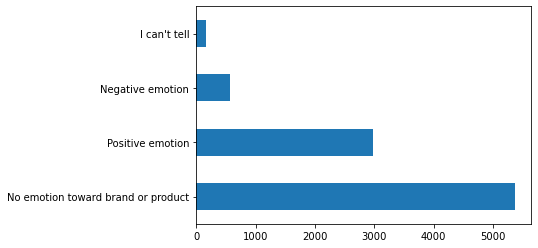

In [102]:
#knowing that this is all the NAN values in which we dont have an identified object we should see the distribution target variable 
nan_values.is_there_an_emotion_directed_at_a_brand_or_product.value_counts().plot(kind='barh', stacked = False)

Fixing the placeholders and imputting values based on the context of the tweet

In [103]:
import re

In [104]:
nan_values
#extract what we have observered to be missed NAN values that can be imputted
nan_values['ipad']= nan_values.tweet_text.str.contains('ipad', flags=re.IGNORECASE, case=False)
nan_values['iphone']= nan_values.tweet_text.str.contains('iphone', flags=re.IGNORECASE, case=False)
nan_values['apple']= nan_values.tweet_text.str.contains('apple',flags=re.IGNORECASE, case=False)
nan_values['google']= nan_values.tweet_text.str.contains('google',flags=re.IGNORECASE, case=False)
nan_values['android'] =nan_values.tweet_text.str.contains('android',flags=re.IGNORECASE, case=False)
nan_values['app'] =nan_values.tweet_text.str.contains('app',flags=re.IGNORECASE, case=False)

In [105]:
#set it up so that the boolean True is the name of the column and the boolean False is
nan_values['iphone'] = nan_values['iphone'].map({True: 'iphone', False: ','}) 
nan_values['ipad'] = nan_values['ipad'].map({True: 'ipad', False: ','}) 
nan_values['apple'] = nan_values['apple'].map({True: 'apple', False: ','}) 
nan_values['android'] = nan_values['android'].map({True: 'android', False: ','}) 
nan_values['google'] = nan_values['google'].map({True: 'google', False: ','}) 
nan_values['app'] = nan_values['app'].map({True: 'app', False: ','}) 

In [106]:
nan_values

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,ipad,iphone,apple,google,android,app
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion,",",iphone,",",",",",",","
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone app,Positive emotion,ipad,iphone,",",",",",",app
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion,ipad,",",",",",",",",","
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone app,Negative emotion,",",iphone,",",",",",",app
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion,",",",",",",google,",",","
...,...,...,...,...,...,...,...,...,...
9087,"@mention Yup, but I don't have a third app yet. I'm on Android, any suggestions? #SXSW CC: @mention",placeholder,No emotion toward brand or product,",",",",",",",",android,app
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion,ipad,",",",",",",",",","
9089,"Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link} #google #circles",placeholder,No emotion toward brand or product,",",",",",",google,",",","
9090,"Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev",placeholder,No emotion toward brand or product,",",",",",",google,",",","


In [107]:
#https://stackoverflow.com/questions/39291499/how-to-concatenate-multiple-column-values-into-a-single-column-in-pandas-datafra
#use this to canocate multiple columns and join all the rows
cols = ['ipad', 'google', 'android', 'apple', 'app', 'iphone']
nan_values['combined'] = nan_values[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

In [108]:
nan_values['combined'].value_counts()

,google,,,,               2307
ipad,,,,,                 1536
,,,,app,                  1024
ipad,,,app,                987
,,,,,iphone                785
,,,,,,                     698
,,,,appiphone              469
,,,appleapp,               243
,,android,,,               207
ipad,,appleapp,            175
,,android,app,             144
,,android,,iphone          114
,google,,app,              112
ipad,,,,iphone              84
,,android,appiphone         45
ipad,,,appiphone            40
ipad,android,,,             24
,googleandroid,,,           16
ipad,android,appiphone       9
ipadgoogle,,app,             8
,,,appleappiphone            8
,google,,,iphone             5
ipadgoogle,,,,               4
,,androidappleapp,           4
ipad,android,,iphone         4
,googleandroid,app,          4
ipadgoogle,,appiphone        2
ipad,,appleappiphone         2
,googleandroid,,iphone       2
ipad,android,app,            1
,google,appleapp,            1
Name: combined, dtype: int64

In [109]:
#look at the new columns, where ,,,,,,, represents the nan values which is now 698 compared to the previous 6000 unknown objects 
nan_values


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,ipad,iphone,apple,google,android,app,combined
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion,",",iphone,",",",",",",",",",,,,,iphone"
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone app,Positive emotion,ipad,iphone,",",",",",",app,"ipad,,,appiphone"
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion,ipad,",",",",",",",",",","ipad,,,,,"
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone app,Negative emotion,",",iphone,",",",",",",app,",,,,appiphone"
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion,",",",",",",google,",",",",",google,,,,"
...,...,...,...,...,...,...,...,...,...,...
9087,"@mention Yup, but I don't have a third app yet. I'm on Android, any suggestions? #SXSW CC: @mention",placeholder,No emotion toward brand or product,",",",",",",",",android,app,",,android,app,"
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion,ipad,",",",",",",",",",","ipad,,,,,"
9089,"Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link} #google #circles",placeholder,No emotion toward brand or product,",",",",",",google,",",",",",google,,,,"
9090,"Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev",placeholder,No emotion toward brand or product,",",",",",",google,",",",",",google,,,,"


In [110]:
#686 rows will be dropped 
#MAKE SURE that it has a value of a placeholder as well through the conditional 
nan_values[nan_values['combined'].str.contains(",,,,,,") & nan_values['emotion_in_tweet_is_directed_at'].str.contains('placeholder')].head(10)


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,ipad,iphone,apple,google,android,app,combined
51,"ÛÏ@mention {link} &lt;-- HELP ME FORWARD THIS DOC to all Anonymous accounts, techies,&amp; ppl who can help us JAM #libya #SXSW",placeholder,No emotion toward brand or product,",",",",",",",",",",",",",,,,,,"
52,÷¼ WHAT? ÷_ {link} ã_ #edchat #musedchat #sxsw #sxswi #classical #newTwitter,placeholder,No emotion toward brand or product,",",",",",",",",",",",",",,,,,,"
53,".@mention @mention on the location-based 'fast, fun and future' - {link} (via @mention #sxsw",placeholder,No emotion toward brand or product,",",",",",",",",",",",",",,,,,,"
66,At #sxsw? @mention / @mention wanna buy you a drink. 7pm at Fado on 4th. {link} Join us!,placeholder,No emotion toward brand or product,",",",",",",",",",",",",",,,,,,"
71,Chilcott: @mention #SXSW stand talking with Blogger staff. Too late to win competition for best tweet mentioning @mention So no t-shirt.,placeholder,No emotion toward brand or product,",",",",",",",",",",",",",,,,,,"
73,Gowalla's @mention promises to launch Foursquare check-in + Groupon rewards-type service at #SXSW. Finger's crossed. {link},placeholder,No emotion toward brand or product,",",",",",",",",",",",",",,,,,,"
77,I worship @mention {link} #SXSW,placeholder,No emotion toward brand or product,",",",",",",",",",",",",",,,,,,"
79,"Launching @mention #SxSW? RT @mention @mention Denies Social Network Called Circles Will Debut Today, Despite Report {link}",placeholder,No emotion toward brand or product,",",",",",",",",",",",",",,,,,,"
85,Stay tune @mention showcase #H4ckers {link} #SXSW,placeholder,No emotion toward brand or product,",",",",",",",",",",",",",,,,,,"
86,Thank you @mention @mention for the #touchingstories preso #SXSW . Here's their deck {link},placeholder,No emotion toward brand or product,",",",",",",",",",",",",",,,,,,"


In [111]:
#set the drop df 
nan_values_to_drop = nan_values[nan_values['combined'].str.contains(",,,,,,") & nan_values['emotion_in_tweet_is_directed_at'].str.contains('placeholder')].index

In [112]:
nan_values.drop(nan_values_to_drop, inplace=True)

In [113]:
#something = nan_values.drop('combined', axis=1).join(nan_values['combined'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))

In [114]:
nan_values['combined'].value_counts()

,google,,,,               2307
ipad,,,,,                 1536
,,,,app,                  1024
ipad,,,app,                987
,,,,,iphone                785
,,,,appiphone              469
,,,appleapp,               243
,,android,,,               207
ipad,,appleapp,            175
,,android,app,             144
,,android,,iphone          114
,google,,app,              112
ipad,,,,iphone              84
,,android,appiphone         45
ipad,,,appiphone            40
ipad,android,,,             24
,googleandroid,,,           16
,,,,,,                      13
ipad,android,appiphone       9
ipadgoogle,,app,             8
,,,appleappiphone            8
,google,,,iphone             5
ipadgoogle,,,,               4
,,androidappleapp,           4
ipad,android,,iphone         4
,googleandroid,app,          4
ipadgoogle,,appiphone        2
ipad,,appleappiphone         2
,googleandroid,,iphone       2
ipad,android,app,            1
,google,appleapp,            1
Name: combined, dtype: int64

In [115]:
nan_values['combined'].value_counts()
#drop anything that appear stwice 

,google,,,,               2307
ipad,,,,,                 1536
,,,,app,                  1024
ipad,,,app,                987
,,,,,iphone                785
,,,,appiphone              469
,,,appleapp,               243
,,android,,,               207
ipad,,appleapp,            175
,,android,app,             144
,,android,,iphone          114
,google,,app,              112
ipad,,,,iphone              84
,,android,appiphone         45
ipad,,,appiphone            40
ipad,android,,,             24
,googleandroid,,,           16
,,,,,,                      13
ipad,android,appiphone       9
ipadgoogle,,app,             8
,,,appleappiphone            8
,google,,,iphone             5
ipadgoogle,,,,               4
,,androidappleapp,           4
ipad,android,,iphone         4
,googleandroid,app,          4
ipadgoogle,,appiphone        2
ipad,,appleappiphone         2
,googleandroid,,iphone       2
ipad,android,app,            1
,google,appleapp,            1
Name: combined, dtype: int64

In [116]:
pd.set_option('display.max_colwidth', None)
nan_values[nan_values['combined'] == 'ipad,android,appiphone'].tweet_text

546                                      The #SXSW GO app no available for Blackberry and Windows 7 in addition to iPhone, iPad, and Android: {link}
957                                              ÛÏ@mention Official #SXSW app  Û÷SXSW GOÛª {link} #android #iphone #ipadÛ &lt;thanks!installed
1545        @mention @mention @mention #Platformer CI di venues #SXSW pake 3 app 4sq API,D cnth : Tweetdeck etc (via : iPhone, Android, iPad and PC)
1708                                                                                 Official #SXSW app  Û÷SXSW GOÛª {link} #android #iphone #ipad
2699    Every game or app ad in the #SXSW Interactive guide shows either an iPhone or iPad. AT&amp;T &amp; SXSW's two promos show WP7 &amp; Android.
6397                                                                     RT @mention Official #SXSW app  Û÷SXSW GOÛª {link} #android #iphone #ipad
6398                                                              RT @mention Official #SXSW app  Û÷SXSW 

End of cleaning 
# ________________________________________________________________ 


Start of word vectorization for EDA

In [117]:
nan_values = nan_values.convert_dtypes(str)


In [118]:
nan_values['tweet_text']

0                         .@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.
1             @jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW
2                                                                         @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.
3                                                                      @sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw
4                     @sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)
                                                                              ...                                                                        
9087                                                  @mention Yup, but I do

In [119]:
nan_values[nan_values['tweet_text'].str.contains('\x89')]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,ipad,iphone,apple,google,android,app,combined
38,@mention - False Alarm: Google Circles Not Coming NowÛÒand Probably Not Ever? - {link} #Google #Circles #Social #SXSW,Google,Negative emotion,",",",",",",google,",",",",",google,,,,"
41,"HootSuite - HootSuite Mobile for #SXSW ~ Updates for iPhone, BlackBerry &amp; Android: Whether youÛªre getting friend... {link}",placeholder,No emotion toward brand or product,",",iphone,",",",",android,",",",,android,,iphone"
42,Hey #SXSW - How long do you think it takes us to make an iPhone case? answer @mention using #zazzlesxsw and weÛªll make you one!,placeholder,No emotion toward brand or product,",",iphone,",",",",",",",",",,,,,iphone"
45,#IPad2 's Û÷#SmartCoverÛª Opens to Instant Access - I should have waited to get one! - {link} #apple #SXSW,iPad or iPhone app,Positive emotion,ipad,",",apple,",",",",app,"ipad,,appleapp,"
46,Hand-Held Û÷HoboÛª: Drafthouse launches Û÷Hobo With a ShotgunÛª iPhone app #SXSW {link},placeholder,Positive emotion,",",iphone,",",",",",",app,",,,,appiphone"
...,...,...,...,...,...,...,...,...,...,...
8829,HmmÛ_a slew of iPhone app updates (inc. #4sq3) the past few days? Can only mean one thing: it's #SXSW soon.,placeholder,No emotion toward brand or product,",",iphone,",",",",",",app,",,,,appiphone"
8845,WhatÛªs new with Blogger {link} #blogging #blogger #google #sxsw,placeholder,No emotion toward brand or product,",",",",",",google,",",",",",google,,,,"
8925,umm that would be @mention ÛÏ@mention I keep winning shit! Thanks @mention for the killer iPad case. #sxswÛ,Other app le product or service,Positive emotion,ipad,",",",",",",",",",","ipad,,,,,"
8963,"Group #Texting War Heats Up: Fast Society Launches New Android app , Updates iPhone app : #SXSWÛ_ {link}",Android app,Positive emotion,",",iphone,",",",",android,app,",,android,appiphone"


In [120]:
import re
import nltk
from nltk import pos_tag
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer 

In [121]:
sw = stopwords.words('english')
sw.extend(['link', 'rt', 'sxsw', 'le'])
punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~“!'
twitter_re = re.compile('[#@][a-zA-Z]*')
num_re = re.compile('^\d{1}$')
hashtags = re.compile ("#([a-zA-Z0-9_]{1,50})")

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def txt_clean(txt, stop_words=sw):
    # takes in a string and returns a cleaned up string ready for count or tfidf vectorizing
    
    # splitting the text up into words
    t = txt.split(' ')
    # turning the words lowercase
    t = [w.lower() for w in t]
    # removing punctuation
    t = [w.translate(w.maketrans('','', punctuation)) for w in t]
    # removing @'s and #'s which are twitter jargon
    t = [w for w in t if not twitter_re.match(w)]
    t = [w for w in t if not hashtags.match(w)]

    # removing leftover numbers
    t = [w for w in t if not num_re.match(w)]
    # removing stop words and more twitter jargon
    t = [w for w in t if w not in stop_words]
    # removing empty strings
    t = [w for w in t if w]
    
    # word lemmatizing
    t = pos_tag(t)
    t = [(w[0], get_wordnet_pos(w[1])) for w in t]
    lem = WordNetLemmatizer()
    t = [lem.lemmatize(w[0], w[1]) for w in t]
    # joining all the strings together into one
    return ' '.join(t)

nan_values['tweet_text'] = nan_values['tweet_text'].map(txt_clean)

In [122]:
nan_values=nan_values.convert_dtypes(str)
nan_values= nan_values.applymap(lambda x: x.replace('"', ''))

In [123]:
nan_values['tweet_text']

0                                                             3g iphone hr tweet dead need upgrade plugin station
1                              know awesome ipadiphone app youll likely appreciate design also theyre give free t
2                                                                                                  wait also sale
3                                                                  hope year festival isnt crashy year iphone app
4             great stuff fri marissa mayer google tim oreilly tech booksconferences amp matt mullenweg wordpress
                                                          ...                                                    
9087                                                              yup dont third app yet im android suggestion cc
9088                                                                                              ipad everywhere
9089                                                 wave buzz interrupt regularly sched

In [124]:
from nltk.tokenize import TweetTokenizer


In [125]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
nan_values['tweet_text'] = nan_values['tweet_text'].apply(lambda x: cleaning_URLs(x))


In [126]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Gamer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [127]:
!pip install vaderSentiment

In [128]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)

    if sentiment_dict['compound'] >= 0.05 :
        return "Positive"
 
    elif sentiment_dict['compound'] <= - 0.05 :
        return "Negative"
 
    else :
        return "Neutral"
 


In [129]:
nan_values = nan_values.convert_dtypes(str)

In [130]:
nan_values.tweet_text

0                                                             3g iphone hr tweet dead need upgrade plugin station
1                              know awesome ipadiphone app youll likely appreciate design also theyre give free t
2                                                                                                  wait also sale
3                                                                  hope year festival isnt crashy year iphone app
4             great stuff fri marissa mayer google tim oreilly tech booksconferences amp matt mullenweg wordpress
                                                          ...                                                    
9087                                                              yup dont third app yet im android suggestion cc
9088                                                                                              ipad everywhere
9089                                                 wave buzz interrupt regularly sched

In [131]:

nan_values['.05 threshold sentiment values'] = nan_values['tweet_text'].map(sentiment_scores)
#nan_values['WORK PLEASE'] = nan_values.tweet_text.map(sentiment_scores)

-----------------


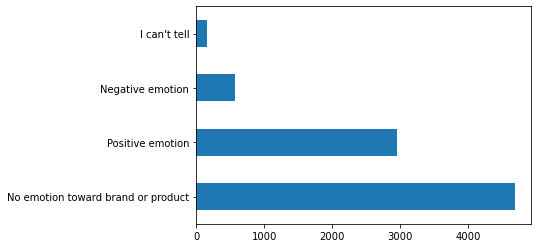

In [132]:
nan_values.is_there_an_emotion_directed_at_a_brand_or_product.value_counts().plot(kind='barh')
print('-----------------')


<AxesSubplot:>

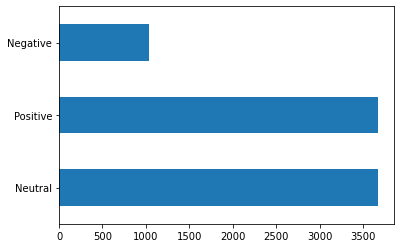

In [133]:
#these values help alleviate the class disparity 
nan_values['.05 threshold sentiment values'].value_counts().plot(kind = 'barh')

In [134]:
nan_values = nan_values.convert_dtypes(str)

In [135]:
nan_values.tweet_text

0                                                             3g iphone hr tweet dead need upgrade plugin station
1                              know awesome ipadiphone app youll likely appreciate design also theyre give free t
2                                                                                                  wait also sale
3                                                                  hope year festival isnt crashy year iphone app
4             great stuff fri marissa mayer google tim oreilly tech booksconferences amp matt mullenweg wordpress
                                                          ...                                                    
9087                                                              yup dont third app yet im android suggestion cc
9088                                                                                              ipad everywhere
9089                                                 wave buzz interrupt regularly sched

In [136]:
nan_values = nan_values.convert_dtypes(str)

In [137]:
import nltk 
nltk.download('punkt')
nan_values['tokenized']= nan_values.tweet_text.map(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gamer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [138]:
nan_values['tokenized']

0                                                                   [3g, iphone, hr, tweet, dead, need, upgrade, plugin, station]
1                                [know, awesome, ipadiphone, app, youll, likely, appreciate, design, also, theyre, give, free, t]
2                                                                                                              [wait, also, sale]
3                                                                         [hope, year, festival, isnt, crashy, year, iphone, app]
4              [great, stuff, fri, marissa, mayer, google, tim, oreilly, tech, booksconferences, amp, matt, mullenweg, wordpress]
                                                                  ...                                                            
9087                                                                    [yup, dont, third, app, yet, im, android, suggestion, cc]
9088                                                                                      

In [139]:
#df[df['tweet_text'].str.contains('iphone')|df['tweet_text'].str.contains('iPhone')]
nan_values[nan_values['tweet_text'].str.contains('\x89')]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,ipad,iphone,apple,google,android,app,combined,.05 threshold sentiment values,tokenized
38,false alarm google circle come nowûòand probably ever,Google,Negative emotion,",",",",",",google,",",",",",google,,,,",Negative,"[false, alarm, google, circle, come, nowûòand, probably, ever]"
41,hootsuite hootsuite mobile update iphone blackberry amp android whether youûªre get friend,placeholder,No emotion toward brand or product,",",iphone,",",",",android,",",",,android,,iphone",Positive,"[hootsuite, hootsuite, mobile, update, iphone, blackberry, amp, android, whether, youûªre, get, friend]"
42,hey long think take u make iphone case answer use weûªll make one,placeholder,No emotion toward brand or product,",",iphone,",",",",",",",",",,,,,iphone",Neutral,"[hey, long, think, take, u, make, iphone, case, answer, use, weûªll, make, one]"
45,û÷#smartcoverûª open instant access wait get one,iPad or iPhone app,Positive emotion,ipad,",",apple,",",",",app,"ipad,,appleapp,",Neutral,"[û÷, #, smartcoverûª, open, instant, access, wait, get, one]"
46,handheld û÷hoboûª drafthouse launch û÷hobo shotgunûª iphone app,placeholder,Positive emotion,",",iphone,",",",",",",app,",,,,appiphone",Neutral,"[handheld, û÷hoboûª, drafthouse, launch, û÷hobo, shotgunûª, iphone, app]"
...,...,...,...,...,...,...,...,...,...,...,...,...
8821,photo iûªm spending sit night chat husband skype iphone coffee,placeholder,No emotion toward brand or product,",",iphone,",",",",",",",",",,,,,iphone",Neutral,"[photo, iûªm, spending, sit, night, chat, husband, skype, iphone, coffee]"
8829,hmmûa slew iphone app update inc past day mean one thing soon,placeholder,No emotion toward brand or product,",",iphone,",",",",",",app,",,,,appiphone",Neutral,"[hmmûa, slew, iphone, app, update, inc, past, day, mean, one, thing, soon]"
8845,whatûªs new blogger,placeholder,No emotion toward brand or product,",",",",",",google,",",",",",google,,,,",Neutral,"[whatûªs, new, blogger]"
8925,umm would ûï@mention keep win shit thanks killer ipad case,Other app le product or service,Positive emotion,ipad,",",",",",",",",",","ipad,,,,,",Negative,"[umm, would, ûï, @, mention, keep, win, shit, thanks, killer, ipad, case]"


In [140]:
nan_values=nan_values.convert_dtypes(str)

# ____________________________
Count vectorization versus TF-IDF 

In [141]:
#X = nan_values['tokenized']
#token_docs = [txt_clean(txt, stop_words=sw) for txt in X]

In [142]:
#token_docs

<AxesSubplot:xlabel='word'>

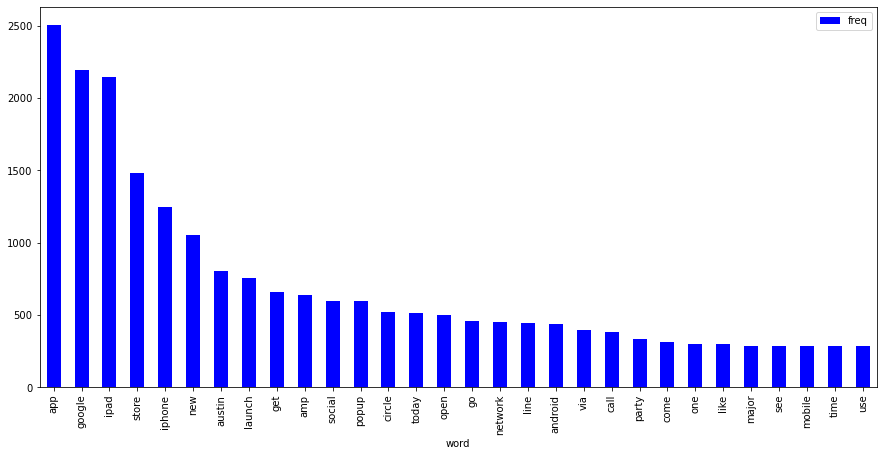

In [143]:
from sklearn.feature_extraction.text import CountVectorizer
X = nan_values['tweet_text']

cv = CountVectorizer(tokenizer=None,
                             preprocessor=None,
                             lowercase=False)
words = cv.fit_transform(X)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')


In [144]:
sum_words

matrix([[2, 2, 1, ..., 1, 1, 2]], dtype=int64)

In [145]:
frequency['word'].iloc[16]

'network'

In [146]:
#!pip install WordCloud

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

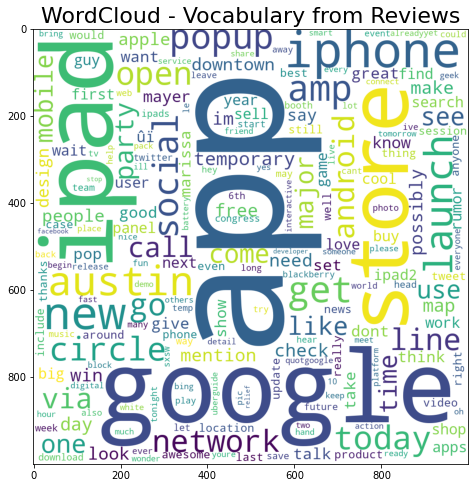

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

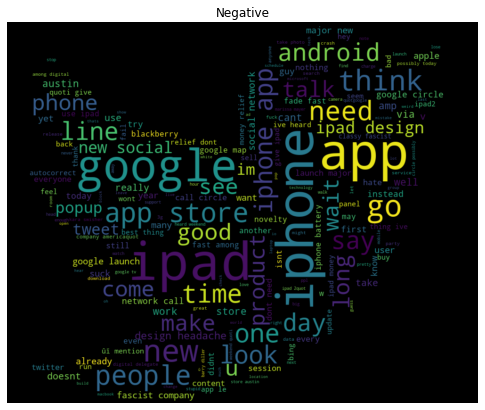

In [148]:
from PIL import Image
twitter_mask = np.array(Image.open("twitter_mask2.png"))
Negative_emotions =' '.join([text for text in nan_values['tweet_text'][nan_values['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion']])

wordcloud = WordCloud(width=800, height=500, mask=twitter_mask, random_state = 0, max_font_size = 110).generate(Negative_emotions)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Negative')
plt.show()



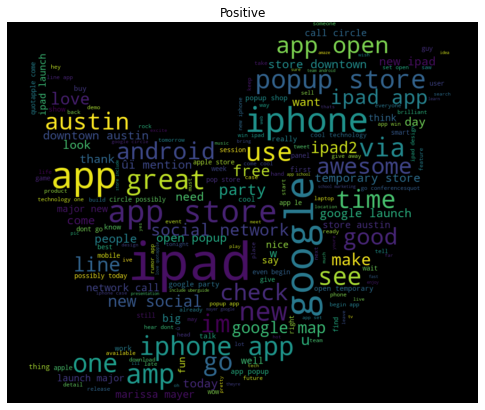

In [149]:
positive_emotions =' '.join([text for text in nan_values['tweet_text'] [nan_values['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion']])

wordcloud = WordCloud(width=800, height=500,mask=twitter_mask, random_state = 0, max_font_size = 110).generate(positive_emotions)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Positive')
plt.show()



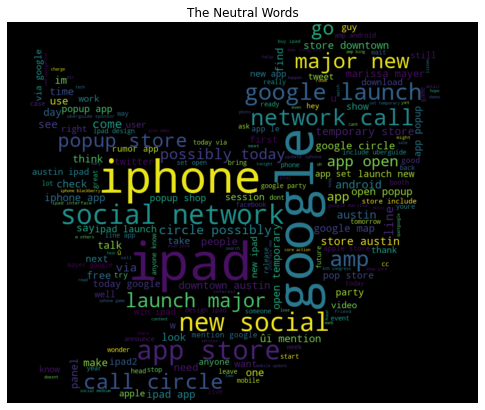

In [150]:

normal_words =' '.join([text for text in nan_values['tweet_text'][nan_values['is_there_an_emotion_directed_at_a_brand_or_product'] == 'No emotion toward brand or product']])

wordcloud = WordCloud(width=800, height=500, mask=twitter_mask, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()


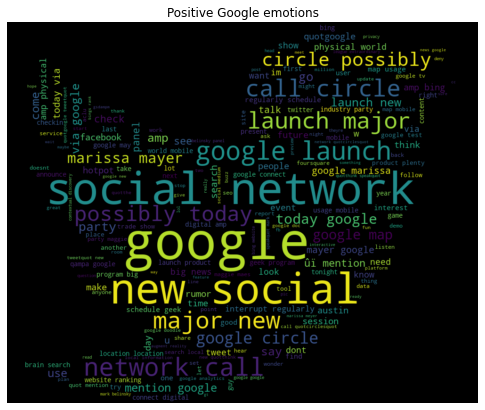

In [151]:

normal_words =' '.join([text for text in nan_values['tweet_text'][nan_values['is_there_an_emotion_directed_at_a_brand_or_product'] == 'No emotion toward brand or product'][nan_values['combined'] == ',google,,,,']])

wordcloud = WordCloud(width=800, height=500, random_state = 0,mask=twitter_mask, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Positive Google emotions')
plt.show()


# Modeling
_________________

In [155]:
nan_values['.05 threshold sentiment values'].value_counts()

Neutral     3672
Positive    3668
Negative    1039
Name: .05 threshold sentiment values, dtype: Int64

In [157]:
nan_values['.05 threshold sentiment values'] = nan_values['.05 threshold sentiment values'].str.replace('Negative', '1') 
nan_values['.05 threshold sentiment values'] = nan_values['.05 threshold sentiment values'].str.replace('Positive', '3')
nan_values['.05 threshold sentiment values'] = nan_values['.05 threshold sentiment values'].str.replace('Neutral', '2')

In [158]:
nan_values['.05 threshold sentiment values']

0       1
1       3
2       2
3       3
4       3
       ..
9087    2
9088    2
9089    1
9090    2
9091    1
Name: .05 threshold sentiment values, Length: 8379, dtype: string

In [159]:
from sklearn.model_selection import train_test_split
X= None
y = None 

X= nan_values['tweet_text']

y= nan_values['.05 threshold sentiment values']
X_t, X_val, y_t, y_val = train_test_split(X, y,
                                          test_size=0.25, random_state=42)

In [160]:
from  nltk import FreqDist
freqdist = FreqDist(words_freq)

most_common = freqdist.most_common(200)

In [161]:

from sklearn.model_selection import train_test_split
X= nan_values['tweet_text']
y= nan_values['.05 threshold sentiment values']
X_t, X_val, y_t, y_val = train_test_split(X, y,
                                          test_size=0.25, random_state=42)

In [162]:
# this is only one type of vec, TF-DIF still exist
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(ngram_range=(2,2))
X_t = v.fit_transform(X_t)
X_val = v.transform(X_val)

In [163]:
X_t = pd.DataFrame(X_t.toarray(), columns = v.get_feature_names())
X_t

,02 symbian,03 blackberry,0310 weve,031111 cover,10 app,10 attendee,10 austin,10 business,10 dangerous,10 day,...,ûó maybe,ûó mention,ûó novelty,ûó quotapp,ûó theft,ûó via,ûójust macbooks,ûólewis carroll,ûómy iphone,ûóthe right
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
v.vocabulary_

{'google place': 9904,
 'place hotpot': 18142,
 'hotpot personalize': 11227,
 'personalize quotfriendquot': 17923,
 'quotfriendquot recommendation': 19168,
 'recommendation pull': 19709,
 'pull facebook': 18909,
 'im go': 11495,
 'go wait': 9504,
 'wait know': 25399,
 'know go': 13447,
 'go well': 9509,
 'well ipad': 25830,
 'free brat': 8499,
 'brat amp': 3647,
 'amp cheesesteaks': 1140,
 'cheesesteaks ipad': 4525,
 'ipad giveaway': 12177,
 'giveaway much': 9309,
 'much little': 16056,
 'little time': 14345,
 'time stomach': 23885,
 'stomach space': 22225,
 'press coverage': 18633,
 'coverage ive': 5529,
 'ive life': 13087,
 'life stand': 13992,
 'stand app': 22010,
 'app line': 1801,
 'marissa mayer': 15155,
 'mayer google': 15328,
 'google connect': 9715,
 'connect digital': 5195,
 'digital amp': 6346,
 'amp physical': 1232,
 'physical world': 18041,
 'world mobile': 26291,
 'fromubersocial iphone': 8629,
 'iphone app': 12677,
 'app store': 1918,
 'store include': 22384,
 'include u

In [165]:
X=None
y=None
X= nan_values.tweet_text
y=nan_values['.05 threshold sentiment values']

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    test_size=0.25)

In [167]:
token_docs=[txt_clean(doc,sw) for doc in X_train]

In [168]:
# Secondary train-test split to build our best model
X_t, X_val, y_t, y_val = train_test_split(token_docs, y_train,
                                          test_size=0.25, random_state=42)

In [169]:
cv = CountVectorizer(max_features=5)

X_t_vec = cv.fit_transform(X_t)
X_t_vec = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(cv.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)

In [170]:
X_t_vec

,app,google,ipad,iphone,store
7951,0,0,0,0,0
8123,1,0,0,0,0
7112,0,1,0,0,0
1494,1,0,0,1,0
2006,0,0,0,1,0
...,...,...,...,...,...
7468,0,0,1,0,0
4336,1,0,1,0,1
6367,1,0,1,0,0
8871,0,0,1,0,0


In [171]:
# We then transform the validation set. (Do not refit the vectorizer!)

X_val_vec = cv.transform(X_val)
X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(cv.vocabulary_)
X_val_vec.set_index(y_val.index, inplace=True)

In [172]:
from collections import defaultdict
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix



    


In [173]:
mnb = MultinomialNB()

mnb.fit(X_t_vec, y_t)

MultinomialNB()

In [174]:
#What should our priors for each class be?

prior_1 = y_t.value_counts()[1]/len(y_t)
prior_0 = y_t.value_counts()[0]/len(y_t)
print(prior_0, prior_1)

0.4430299172501591 0.4370889030341608


In [175]:
mnb.class_count_

array([ 565., 2060., 2088.])

In [176]:
mnb.class_log_prior_

array([-2.1212542 , -0.82761867, -0.81411798])

In [177]:
mnb.feature_count_

array([[137., 119., 156., 121.,  88.],
       [667., 592., 506., 251., 494.],
       [612., 501., 550., 350., 266.]])

In [178]:
mnb.n_features_in_

5

In [ ]:
nltk.

In [181]:
y_hat = mnb.predict(X_val_vec)
accuracy_score(y_val, y_hat)

0.5187778485041374

In [198]:
cm = confusion_matrix(y_val, y_hat)

cm


array([[  0,  30, 172],
       [  0, 375, 328],
       [  0,  60, 606]], dtype=int64)

In [183]:
accuracy_score(y_val, y_hat)

0.5187778485041374

In [184]:
cv = CountVectorizer()
X_t_vec = cv.fit_transform(X_t)
X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(cv.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)


X_val_vec = cv.transform(X_val)
X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(cv.vocabulary_)
X_val_vec.set_index(y_val.index, inplace=True)

In [185]:
mnb = MultinomialNB()

mnb.fit(X_t_vec, y_t)
y_hat = mnb.predict(X_val_vec)
accuracy_score(y_val, y_hat)

0.7683004455760662

In [186]:
accuracy_score(y_val, y_hat)

0.7683004455760662

In [187]:
len(cv.vocabulary_)

5962

In [188]:
cv = CountVectorizer(min_df=0.05, max_df=0.95)
X_t_vec = cv.fit_transform(X_t)
X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(cv.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)

X_val_vec = cv.transform(X_val)
X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(cv.vocabulary_)
X_val_vec.set_index(y_val.index, inplace=True)

mnb = MultinomialNB()

mnb.fit(X_t_vec, y_t)
y_hat = mnb.predict(X_val_vec)

accuracy_score(y_val, y_hat)

0.5181413112667091

In [ ]:
len(cv.vocabulary_)

In [189]:
tfidf = TfidfVectorizer(ngram_range=(2,2))
X_t_vec = tfidf.fit_transform(X_t)
X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(tfidf.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)

X_val_vec = tfidf.transform(X_val)
X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(tfidf.vocabulary_)
X_val_vec.set_index(y_val.index, inplace=True)

mnb = MultinomialNB()

mnb.fit(X_t_vec, y_t)
y_hat = mnb.predict(X_val_vec)

accuracy_score(y_val, y_hat)

0.6779121578612349

In [190]:
len(tfidf.vocabulary_)

21692

In [191]:
tfidf = TfidfVectorizer(ngram_range=(1,2))
X_t_vec = tfidf.fit_transform(X_t)
X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(tfidf.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)

X_val_vec = tfidf.transform(X_val)
X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(tfidf.vocabulary_)
X_val_vec.set_index(y_val.index, inplace=True)

mnb = MultinomialNB()

mnb.fit(X_t_vec, y_t)
y_hat = mnb.predict(X_val_vec)
accuracy_score(y_val, y_hat)

0.7294716740929345

In [192]:
tfidf.vocabulary_

{'hey': 11323,
 'marissa': 15531,
 'bill': 3481,
 'cosby': 5767,
 'call': 4251,
 'want': 26202,
 'sweater': 23596,
 'back': 2937,
 'hey marissa': 11344,
 'marissa bill': 15532,
 'bill cosby': 3482,
 'cosby call': 5768,
 'call want': 4291,
 'want sweater': 26246,
 'sweater back': 23597,
 'sony': 22479,
 'samsung': 20998,
 'follow': 8874,
 'app': 1788,
 'hp': 11737,
 'lead': 14200,
 'sony samsung': 22481,
 'samsung follow': 21001,
 'follow app': 8877,
 'app hp': 1918,
 'hp lead': 11739,
 'mayer': 15682,
 'people': 18220,
 'drive': 7228,
 '12bn': 102,
 'mile': 16059,
 'year': 27243,
 'use': 25616,
 'google': 10131,
 'map': 15434,
 'navigation': 16610,
 'whither': 26648,
 'sit': 22074,
 'nav': 16602,
 'mayer people': 15714,
 'people drive': 18235,
 'drive 12bn': 7232,
 '12bn mile': 103,
 'mile year': 16064,
 'year use': 27284,
 'use google': 25654,
 'google map': 10315,
 'map navigation': 15470,
 'navigation whither': 16622,
 'whither sit': 26649,
 'sit nav': 22084,
 'goodguide': 10121,
 '

In [193]:
rf = RandomForestClassifier(n_estimators=1000, max_features=10, max_depth=10)
rf.fit(X_t_vec, y_t)
y_hat = rf.predict(X_val_vec)
accuracy_score(y_val, y_hat)

0.6244430299172502

In [194]:
#significant increase from model with original sentiment through amazon turk

In [195]:
nan_values

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,ipad,iphone,apple,google,android,app,combined,.05 threshold sentiment values,tokenized
0,3g iphone hr tweet dead need upgrade plugin station,iPhone,Negative emotion,",",iphone,",",",",",",",",",,,,,iphone",1,"[3g, iphone, hr, tweet, dead, need, upgrade, plugin, station]"
1,know awesome ipadiphone app youll likely appreciate design also theyre give free t,iPad or iPhone app,Positive emotion,ipad,iphone,",",",",",",app,"ipad,,,appiphone",3,"[know, awesome, ipadiphone, app, youll, likely, appreciate, design, also, theyre, give, free, t]"
2,wait also sale,iPad,Positive emotion,ipad,",",",",",",",",",","ipad,,,,,",2,"[wait, also, sale]"
3,hope year festival isnt crashy year iphone app,iPad or iPhone app,Negative emotion,",",iphone,",",",",",",app,",,,,appiphone",3,"[hope, year, festival, isnt, crashy, year, iphone, app]"
4,great stuff fri marissa mayer google tim oreilly tech booksconferences amp matt mullenweg wordpress,Google,Positive emotion,",",",",",",google,",",",",",google,,,,",3,"[great, stuff, fri, marissa, mayer, google, tim, oreilly, tech, booksconferences, amp, matt, mullenweg, wordpress]"
...,...,...,...,...,...,...,...,...,...,...,...,...
9087,yup dont third app yet im android suggestion cc,placeholder,No emotion toward brand or product,",",",",",",",",android,app,",,android,app,",2,"[yup, dont, third, app, yet, im, android, suggestion, cc]"
9088,ipad everywhere,iPad,Positive emotion,ipad,",",",",",",",",",","ipad,,,,,",2,"[ipad, everywhere]"
9089,wave buzz interrupt regularly schedule geek program big news,placeholder,No emotion toward brand or product,",",",",",",google,",",",",",google,,,,",1,"[wave, buzz, interrupt, regularly, schedule, geek, program, big, news]"
9090,google zeiger physician never report potential ae yet fda relies physician quotwere operate wout dataquot,placeholder,No emotion toward brand or product,",",",",",",google,",",",",",google,,,,",2,"[google, zeiger, physician, never, report, potential, ae, yet, fda, relies, physician, quotwere, operate, wout, dataquot]"
